In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Adaptive Resonance Theory (ART)

In **Chapter 16** and **Chapter 18**, we learned about competitive networks and the **stability problem** in learning, particularly with networks that might not converge as more inputs are applied. In this chapter, we introduce **Adaptive Resonance Theory (ART)**, which is designed to overcome this stability issue.

## Objectives

The primary objective of ART is to address the **stability/plasticity dilemma**, a concept introduced by **Grossberg**, to allow the network to remain receptive to new patterns while retaining previously learned patterns.

## Theory and Examples

Competitive networks and the **Grossberg network** (from Chapter 18) can struggle with forming stable clusters. Grossberg's findings indicate:
- If the number of input patterns is limited or if clusters do not exceed available neurons in **Layer 2**, the network can stabilize.
- However, **arbitrary input patterns** can lead to instability, as recent learning can erode previous knowledge, a characteristic referred to as **plasticity**.

Grossberg termed this issue the **stability/plasticity dilemma**. Biological systems can manage stability and plasticity well, allowing them to identify familiar patterns even after prolonged absence or exposure to new patterns.

### Key Concepts in Adaptive Resonance Theory (ART)

- **Expectations**: ART uses "expectations" to address stability. When an input pattern is introduced, it is compared with the network's **prototype vector** that it closely matches. If the match isn't sufficient, a new prototype is selected, preserving previously learned prototypes.

### Overview of Adaptive Resonance

The **ART architecture** is derived from the **Grossberg network**. It introduces the following elements to stabilize learning:
- **L2 to L1 Expectations**: Prototypes for comparison.
- **Orienting Subsystem**: Governs response to novel inputs.
- **Gain Control**: Manages network responses.

Below is the basic architecture:

$$ \text{Layer 2} \rightarrow \text{Layer 1 Expectations} \rightarrow \text{Orienting Subsystem} \rightarrow \text{Gain Control} $$

In the following sections, we will explore each subsystem and examine **ART1** for binary input vectors, to understand the core mechanisms of **Adaptive Resonance Theory**.


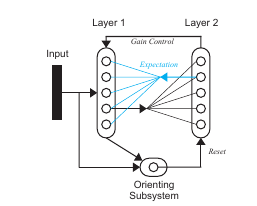

Figure.1 Basic ART Architecture


# ART1 Network - Layer 1 and L1-L2 Connections

In **Last Chapter**, we learned that the **L1-L2 connections** in the **Grossberg network** operate as **instars**, which facilitate clustering. This chapter expands upon these principles in the context of **Adaptive Resonance Theory (ART)**, specifically within the **ART1 network**.

## L1-L2 Connections in Grossberg Networks

The **L1-L2 connections** in the Grossberg network perform a clustering (or **categorization**) operation:
- When an input pattern is presented, it is **multiplied** by the **L1-L2 weight matrix** after normalization.
- **Competition** occurs in **Layer 2** to find the row of the weight matrix closest to the input vector.
- This **winning row** is moved toward the input vector, effectively forming clusters over repeated learning.

### Prototypes and Categories

After learning, each row in the **L1-L2 weight matrix** represents a **prototype pattern** corresponding to a cluster (or category) of input vectors.

## Feedback Connections in ART Networks

In ART networks, feedback connections from **Layer 2 to Layer 1** support pattern recall. These connections, termed **outstars** (see Chapter 15), help:
- **Reproduce a prototype pattern (expectation)** at Layer 1 when a node in Layer 2 is activated.
- Compare this expectation with the **input pattern** in Layer 1.

If the **input** and **expectation patterns** do not match, the **orienting subsystem** initiates a reset in Layer 2. This reset:
1. **Disables the current winning neuron** in Layer 2, removing the current expectation.
2. **Reinitiates competition** in Layer 2 with the previous winning neuron disabled.
3. **Projects a new expectation** from the newly winning neuron in Layer 2 to Layer 1.

This process continues until the **L2-L1 expectation** closely matches the **input pattern**.

## Detailed Structure of Layer 1 in ART1

In ART1, **Layer 1**:
- **Compares** the input pattern with the expectation pattern from Layer 2 (both are binary in ART1).
- **Resets** if the patterns do not match, via the orienting subsystem.

### Structure and Function of Layer 1

The ART1 **Layer 1** design is similar to the **Grossberg network's Layer 1**, but with key differences:
- **No normalization** is performed in Layer 1 of ART1, so there are no **on-center/off-surround connections** from the input vector.
- **Excitatory Input**: Consists of a combination of the input pattern and the **L1-L2 expectation**.
- **Inhibitory Input**: Originates from the **gain control signal** in Layer 2.

These inputs function together to compare and adjust patterns, ultimately forming a new **prototype pattern** if a close match is found.

### Mathematical Description of Layer 1

To further understand the operations, we will explore the differential equations governing the behavior of each subsystem. Subsequently, we will derive the **steady state responses** of these subsystems and summarize the overall operation of the **ART1 system**.

$$
\text{Input Pattern} \rightarrow \text{Layer 1} \rightarrow \text{Comparison with Expectation} \rightarrow \text{Orienting Subsystem (if mismatch)} \rightarrow \text{Reset Layer 2}
$$


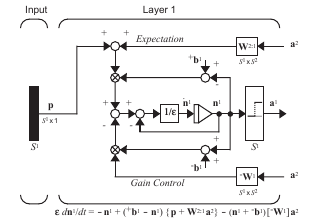
Figure.2 Layer 1 of the ART1 Network


# ART1 Network - Layer 1 Equations and Operation

**Figure.2** describes the operation of **Layer 1** in the **ART1 Network**. In this layer, the **excitatory** and **inhibitory inputs** work together to determine the output based on a **shunting model**. Here, we detail the mathematical equations governing this operation.

## Layer 1 Equation of Operation

The equation for the **Layer 1** operation is as follows:

$$
\frac{1}{\epsilon} \frac{dn(t)}{dt} = -n(t) + (b - n(t)) \{ p + W^{2:1} a(t) \} - (n(t) + b) \left[ W^{1} \right] a(t)
\tag{19.1}
$$

where:
- $ n(t) $ represents the neuron state in **Layer 1**.
- $ \epsilon $ is a small positive constant affecting the rate of response.
- $ b $ is a bias term that affects neuron activation.
- $ p $ is the **input pattern**.
- $ W^{2:1} $ is the **L2-L1 weight matrix** representing expectations from **Layer 2** to **Layer 1**.
- $ W^{1} $ is the **gain control** matrix from **Layer 2**.

### Layer 1 Output Calculation

The **output** of **Layer 1** is given by:

$$
a = \text{hardlim}(n)
\tag{19.2}
$$

where the **hard limit** function is defined as:

$$
\text{hardlim}(n) = 
\begin{cases} 
1, & n > 0 \\
0, & n \leq 0 
\end{cases}
\tag{19.3}
$$

### Excitatory Input in Layer 1

Equation (19.1) is a **shunting model** with an **excitatory input**:

$$
p + W^{2:1} a(t)
$$

This term combines the **input vector** $ p $ and the **L2-L1 expectation** $ W^{2:1} a(t) $. 

For example, if the **jth neuron in Layer 2** wins the competition (i.e., has output 1 while others are zero), then:

$$
W^{2:1} a = w^{2:1}_j
\tag{19.4}
$$

where $ w^{2:1}_j $ is the **jth column** of the matrix $ W^{2:1} $, trained using an **outstar rule**.

Thus, the **excitatory input** becomes:

$$
p + W^{2:1} a = p + w^{2:1}_j
\tag{19.5}
$$

Each column of the **L2-L1 matrix** represents a distinct **expectation** (or prototype pattern). In Layer 1, the input pattern and the expectation are combined using an **AND operation**.

### Inhibitory Input in Layer 1 (Gain Control)

The **inhibitory input** to Layer 1 is governed by the **gain control** term:

$$
\left[ W^{1} \right] a(t)
$$

where:

$$
W^{1} = 
\begin{bmatrix}
1 & 1 & \dots & 1 \\
1 & 1 & \dots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \dots & 1 
\end{bmatrix}
\tag{19.6}
$$

This means that the **inhibitory input** to each neuron in Layer 1 is the **sum of all outputs** from **Layer 2**. Given that **Layer 2** uses a **winner-take-all** competition, only one neuron in Layer 2 will be active at a time, making the **gain control** input 1 when Layer 2 is active, and 0 when inactive.

The **gain control** term plays an important role in regulating Layer 1 activity, which will become clear as we analyze the **steady-state behavior** of Layer 1.



## Steady State Analysis of Neuron Response in Layer 1

The response of neuron $ i $ in **Layer 1** is described by the following differential equation:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \left\{ p_i + \sum_{j=1}^{S_2} w^{2:1}_{i,j} a_j \right\} - (n_i + b) \sum_{j=1}^{S_2} a_j
\tag{19.7}
$$

where:
- $ \epsilon \ll 1 $, meaning that the short-term memory traces (neuron outputs) change much faster than the long-term memory traces (weight matrices).

We aim to investigate the steady-state response for **two different cases**:

1. When **Layer 2 is inactive** (i.e., $ a_j = 0 $ for all $ j $).
2. When **Layer 2 is active**, with only one neuron in **Layer 2** having an output of 1, and all other neurons having an output of 0.

## Case 1: Layer 2 Inactive

When **Layer 2 is inactive** (i.e., each $ a_j = 0 $), Equation (19.7) simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \{ p_i \}
\tag{19.8}
$$

In the **steady state** $ \left( \frac{dn_i}{dt} = 0 \right) $, we have:

$$
0 = -n_i + (b - n_i) p_i = - (1 + p_i) n_i + b p_i
\tag{19.9}
$$

Solving for the **steady-state neuron output** $ n_i $:

$$
n_i = \frac{b \, p_i}{1 + p_i}
\tag{19.10}
$$

Thus, for different values of $ p_i $:
- If $ p_i = 0 $, then $ n_i = 0 $.
- If $ p_i = 1 $, then $ n_i = \frac{b}{2} > 0 $.

Since we chose the **transfer function** for **Layer 1** to be the **hard limit (hardlim) function**, the output $ a $ of **Layer 1** becomes:

$$
a = p
\tag{19.11}
$$

Therefore, when **Layer 2 is inactive**, the output of **Layer 1** matches the **input pattern**.

## Case 2: Layer 2 Active

Now consider the case where **Layer 2 is active**. Assume that **neuron \( j \)** in **Layer 2** is the **winning neuron**. In this case:

- $ a_j = 1 $
- $ a_k = 0 $ for $ k \neq j $.

For this condition, Equation (19.7) simplifies to:

# Steady State Analysis of Layer 1 with Active and Inactive Layer 2

The differential equation describing the response of neuron $ i $ in **Layer 1** when **Layer 2** is active is given by:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \{ p_i + w^{2:1}_{i,j} \} - (n_i + b)
\tag{19.12}
$$

In the **steady state** $ \left( \frac{dn_i}{dt} = 0 \right) $, we have:

$$
0 = -n_i + (b - n_i) \{ p_i + w^{2:1}_{i,j} \} - (n_i + b)
\tag{19.13}
$$

Simplifying, we get:

$$
0 = - (1 + p_i + w^{2:1}_{i,j} + 1) n_i + b (p_i + w^{2:1}_{i,j}) - b
\tag{19.14}
$$

Solving for the steady-state output \( n_i \), we have:

$$
n_i = \frac{b (p_i + w^{2:1}_{i,j}) - b}{2 + p_i + w^{2:1}_{i,j}}
\tag{19.15}
$$

### Logical AND Operation in Layer 1

Layer 1 should combine the **input vector** with the **expectation from Layer 2** (represented by $ w^{2:1}_j $). Since we use binary patterns for both input and expectation, a **logical AND operation** is applied. This means that $ n_i $ should be:
- Less than zero when either $ p_i $ or $ w^{2:1}_{i,j} $ is zero.
- Greater than zero when both $ p_i $ and $ w^{2:1}_{i,j} $ are one.

Applying these conditions to Eq. (19.15), we derive the following:

$$
b(2) - b > 0
\tag{19.16}
$$

and

$$
b - b < 0
\tag{19.17}
$$

which leads to:

$$
b(2) > b > b
\tag{19.18}
$$

To satisfy these conditions, we could select values like \( b = 1 \) and \( b = 1.5 \).

Thus, when neuron $ j $ in Layer 2 is active, the output of Layer 1 is:

$$
a = p \cap w^{2:1}_j
\tag{19.19}
$$

where $ \cap $ represents the **logical AND operation**.

### Gain Control for AND Operation

The gain control term is necessary to implement the AND operation. Consider the numerator of Eq. (19.15):

$$
b(p_i + w^{2:1}_{i,j}) - b
\tag{19.20}
$$

Without the gain control term (here set as 1), Eq. (19.20) would represent an OR operation instead of an AND operation. Layer 1 requires the AND operation, as shown by the critical orienting subsystem discussed later.

### Summary of Layer 1 Operation

For **inactive Layer 2** (i.e., all $ a_j = 0 $):
$$
a = p
\tag{19.21}
$$

For **active Layer 2** (i.e., one $ a_j = 1 $):
$$
a = p \cap w^{2:1}_j
\tag{19.22}
$$

### Example Calculation with Network Parameters

Assuming the following network parameters:

$$
\epsilon = 0.1, \quad b = 1, \quad b = 1.5
\tag{19.23}
$$

with two neurons in Layer 2, two elements in the input vector, and the following weight matrix and input vector:

$$
W^{2:1} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \quad \text{and} \quad p = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\tag{19.24}
$$

If neuron 2 in Layer 2 wins the competition (i.e., $ a_2 = 1 $), the operation equations for **Layer 1** are:

For $ n_1 $:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -n_1 + (1 - n_1) \{ p_1 + w^{2:1}_{1,2} \} - (n_1 + 1.5)
\tag{19.25}
$$

which simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -3n_1 - 0.5
$$

For \( n_2 \):

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -n_2 + (1 - n_2) \{ p_2 + w^{2:1}_{2,2} \} - (n_2 + 1.5)
\tag{19.26}
$$

which simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -4n_2 + 0.5
$$

These equations can be further analyzed to demonstrate the behavior of **Layer 1** under different network conditions.



## Steady State Solutions of Layer 1

For **Layer 1**, the differential equations describing the responses of neurons $ n_1 $ and $ n_2 $ are:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -30n_1 - 5
\tag{19.26}
$$

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -40n_2 + 5
\tag{19.27}
$$

In this simplified case, we can find closed-form solutions for these equations. Assuming both neurons start with **zero initial conditions**, the solutions are:

For \( n_1(t) \):

$$
n_1(t) = -\frac{1}{6} \left[ 1 - e^{-30t} \right]
\tag{19.28}
$$

For \( n_2(t) \):

$$
n_2(t) = \frac{1}{8} \left[ 1 - e^{-40t} \right]
\tag{19.29}
$$

### Figure.3: Response of Layer 1 Neurons

The responses $ n_1(t) $ and $ n_2(t) $ are plotted in Figure 19.3 below:

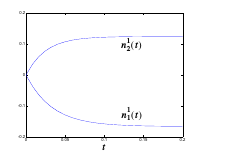

Figure.3 Response of Layer 1

- The plot shows that $ n_1(t) $ converges to a **negative value**.
- $ n_2(t) $ converges to a **positive value**.

As a result, the activations $ a_1(t) $ and $ a_2(t) $ converge as follows:
- $ a_1(t) \to 0 $
- $ a_2(t) \to 1 $

Since the transfer function for Layer 1 is the **hardlim function**, these results align with the steady-state analysis (Eq. (19.21)):

$$
a_1 = p \cap w^{2:1}_2 = 0 \cap 1 = 0
\tag{19.30}
$$

This response demonstrates the binary nature of the system under the influence of the hardlim function and confirms that neuron activations align with the network's logical AND expectations.




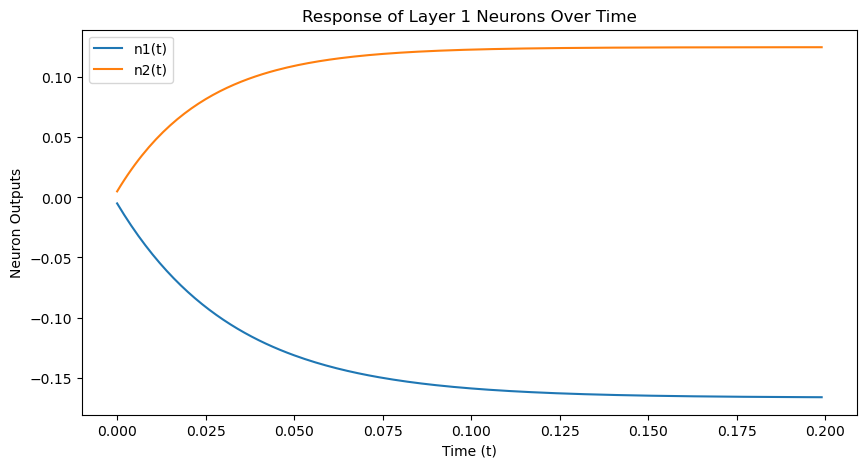

In [1]:
# Define constants and initial conditions
b_plus = 1
b_minus = 1.5
epsilon = 0.1
p1, p2 = 0, 1
w21 = 1  # Given in the weight matrix, W[2][1]

# Time step and total time
time_step = 0.001
total_time = 0.2
time_steps = int(total_time / time_step)

# Lists to store results for plotting
n1_values = []
n2_values = []
time_values = []

# Initialize values for n1 and n2
n1 = 0
n2 = 0

# Iterate over each time step to simulate the differential equations
for t in range(time_steps):
    current_time = t * time_step

    # Differential equation calculations for n1 and n2
    dn1_dt = -30 * n1 - 5
    dn2_dt = -40 * n2 + 5

    # Update n1 and n2 using Euler's method
    n1 += dn1_dt * time_step
    n2 += dn2_dt * time_step

    # Append the results for plotting
    n1_values.append(n1)
    n2_values.append(n2)
    time_values.append(current_time)

# Prepare data for plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn plot setup
plt.figure(figsize=(10, 5))
sns.lineplot(x=time_values, y=n1_values, label="n1(t)")
sns.lineplot(x=time_values, y=n2_values, label="n2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Neuron Outputs")
plt.title("Response of Layer 1 Neurons Over Time")
plt.legend()
plt.show()


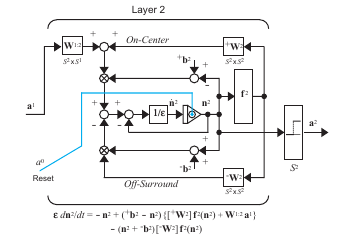

Figure.4 Layer 2 of the ART1 Network

# ART1 Network - Layer 2 Overview

Layer 2 of the ART1 network is almost identical to Layer 2 of the Grossberg network. Its main purpose is to **contrast enhance** the output pattern through a **winner-take-all competition**, where only the neuron receiving the largest input will produce a non-zero output.

However, one key difference exists between these two networks: the **resettable integrator** in Layer 2 of ART1. This integrator, denoted by $ n $, resets any positive outputs to zero whenever the reset signal $ a $ becomes positive. Reset outputs remain inhibited for an extended period, only reactivating when an adequate match occurs, and weights are updated.

In the original ART1 paper, Carpenter and Grossberg suggested implementing this reset mechanism with a **gated dipole field** $[CaGr87]$, later expanding to a model using chemical neurotransmitters in the ART3 architecture $[CaGr90]$.

## Mathematical Formulation

The following is the operation equation for Layer 2 of the ART1 network:

$$
\frac{d n^2(t)}{dt} = -n^2(t) + (b - n^2(t)) \left( W^{+} f(n^2(t)) + W^{1:2} a \right) - (n^2(t) + b) W^{-} f(n^2(t))
$$

where:

-$ W^{+} $ provides **on-center feedback connections**
- $ W^{-} $ provides **off-surround feedback connections**
- $ W^{1:2} $ is the matrix of adaptive weights trained using an **instar rule**, representing prototype patterns after training

### Example Parameters

Consider a two-neuron layer with the following parameters:

- $ \epsilon = 0.1 $
- $ b = 1 $
- $ W^{+} = 0.5 $
- $ W^{1:2} = \begin{bmatrix} 1 \\ 0.5 \end{bmatrix} $

For the transfer function $ f(n) $, we use:

$$
f(n) = 
\begin{cases} 
      10n & n \geq 0 \\
      0 & n < 0 
   \end{cases}
$$

The layer's operation equations for neurons 1 and 2 become:

$$
\frac{d n_1(t)}{dt} = -n_1(t) + (1 - n_1(t)) \left( f(n_1(t)) + W^{1:2} a \right) - (n_1(t) + 1) f(n_2(t))
$$

$$
\frac{d n_2(t)}{dt} = -n_2(t) + (1 - n_2(t)) \left( f(n_2(t)) + W^{1:2} a \right) - (n_2(t) + 1) f(n_1(t))
$$

### Competition Mechanism

The input to Layer 2 is determined by the inner products between **prototype patterns** (rows of $ W^{1:2} $) and the output of Layer 1. A **winner-take-all competition** forces the neuron with the largest input to have a positive value, while the other neuron is forced negative. The output layer uses a **hardlimiting transfer function** to produce binary outputs, where only the winning neuron outputs 1.

For example, if the input vector is $ a = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $, the response will be based on the neuron with the highest inner product with this input.



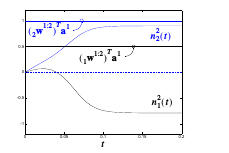

Figure.5 Response of Layer 2

At steady state, **neuron 2** wins the competition because the second row of $ W^{1:2} $ has a larger inner product with the input vector. Consequently, $ n_2(t) $ will have a positive value, while $ n_1(t) $ will have a negative value.

Thus, the steady-state output of Layer 2 will be:

$
a = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$

with the equations:

$
n_2(t) > 0, \quad n_1(t) < 0
$


### Response of Layer 2 at Steady State

For reference, the response plot of Layer 2 can be visualized as follows:

$$
\begin{array}{cc}
t & n(t) \\
0.05 & -1 \\
0.1 & 0 \\
0.15 & 0.5 \\
0.2 & 1 \\
\end{array}
$$

where neuron 2 reaches a steady positive value while neuron 1 remains negative.

## Summary of Layer 2 Operation at Steady State

At steady state, Layer 2 can be summarized by the following rule:

$$
a_i = 
\begin{cases} 
1, & \text{if } \left( W^{1:2}_{i} \right)^T a = \max \left( \left( W^{1:2}_{j} \right)^T a \right) \\
0, & \text{otherwise} 
\end{cases}
$$

where $ i $ and $ j $ refer to the neurons in Layer 2.

This equation (19.37) highlights the **winner-take-all** competition mechanism, where only the neuron with the maximum inner product with the input vector \( a \) will have an output of 1, while all other neurons will output 0.


Input vector (a): [1, 0]
Inner products: [1.0, 0.5]
Layer 2 output (winner-take-all): [1, 0]


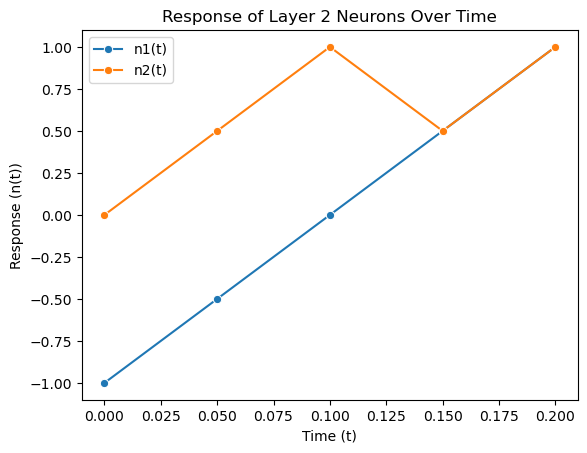

In [1]:
# Define the weight matrix W for the prototype patterns
W = [
    [1, 0.5],  # Weights for neuron 1
    [0.5, 1]   # Weights for neuron 2
]

# Define the input vector a
a = [1, 0]

# Function to calculate the inner products and apply winner-take-all mechanism
def layer2_output(W, a):
    # Calculate inner products of input with each row in W manually
    inner_products = [sum(W[i][j] * a[j] for j in range(len(a))) for i in range(len(W))]
    # Find the index of the maximum inner product
    max_value = max(inner_products)
    winner_index = inner_products.index(max_value)
    # Create an output array with 0s and set the output of the winning neuron to 1
    output = [1 if i == winner_index else 0 for i in range(len(W))]
    return output, inner_products

# Get Layer 2 output
output, inner_products = layer2_output(W, a)

# Print results
print("Input vector (a):", a)
print("Inner products:", inner_products)
print("Layer 2 output (winner-take-all):", output)

# Plot the response of Layer 2 using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Time values for the x-axis
t_values = [0, 0.05, 0.1, 0.15, 0.2]
# Response values for each neuron over time
n1_values = [-1, -0.5, 0, 0.5, 1]
n2_values = [0, 0.5, 1, 0.5, 1]

# Plot using Seaborn
sns.lineplot(x=t_values, y=n1_values, label="n1(t)", marker="o")
sns.lineplot(x=t_values, y=n2_values, label="n2(t)", marker="o")
plt.xlabel("Time (t)")
plt.ylabel("Response (n(t))")
plt.title("Response of Layer 2 Neurons Over Time")
plt.legend()
plt.show()


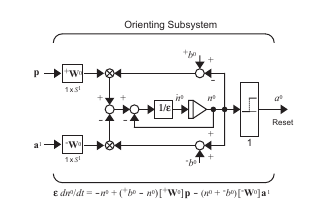

Figure.6 Orienting Subsystem of the ART1 Network

## Orienting Subsystem of the ART1 Network

The Orienting Subsystem is a critical component of the ART1 network, responsible for determining if there is a sufficient match between the expected pattern (from Layer 2 to Layer 1) and the input pattern. If the match is insufficient, the Orienting Subsystem generates a reset signal to inhibit the current winning neuron in Layer 2, allowing other neurons to compete.

The equation of operation for the Orienting Subsystem is given by:

$$
\epsilon \frac{dn_0(t)}{dt} = -n_0(t) + \left(b_0 - n_0(t)\right) \left( W^+ p \right) - \left(n_0(t) + b_0\right) \left( W^- a \right)
$$

where:
- $ n_0(t) $ represents the state of the Orienting Subsystem,
- $ W^+ p $ is the excitatory input,
- $ W^- a $ is the inhibitory input,
- $ \epsilon $ is a small positive constant.

### Excitatory Input

The excitatory input to the Orienting Subsystem, $ W^+ p $, is defined as:

$$
W^+ = \begin{bmatrix} \alpha & \alpha & \cdots & \alpha \end{bmatrix}
$$

where each element is $ \alpha $. Therefore, the excitatory input can be expressed as:

$$
W^+ p = \alpha \sum_{j=1}^{S} p_j = \alpha p
$$

where $ p $ is a binary vector and $ S $ is the number of input features.

### Inhibitory Input

The inhibitory input to the Orienting Subsystem, $ W^- a $, is defined as:

$$
W^- = \begin{bmatrix} \beta & \beta & \cdots & \beta \end{bmatrix}
$$

where each element is $ \beta $. The inhibitory input can then be written as:

$$
W^- a = \beta \sum_{j=1}^{S} a_j(t) = \beta a
$$

where $ a $ is the output from Layer 2.

### Summary

The Orienting Subsystem’s operation can be summarized by the shunting equation (19.38):

$$
\epsilon \frac{dn_0(t)}{dt} = -n_0(t) + \left(b_0 - n_0(t)\right) \left( W^+ p \right) - \left(n_0(t) + b_0\right) \left( W^- a \right)
$$

If the match between $ W^+ p $ and $ W^- a $ is insufficient, the reset mechanism triggers to inhibit the current winning neuron.


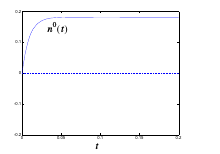

Figure.7 Response of the Orienting Subsystem

## Orienting Subsystem of the ART1 Network

The Orienting Subsystem checks whether the match between the input pattern and the Layer 2 expectation is sufficient. If the match is inadequate, the subsystem sends a reset signal to Layer 2. The reset mechanism inhibits the previously winning neuron, allowing other neurons to compete.

The steady-state equation of operation for the Orienting Subsystem is:

$$
0 = -n_0 + \left( b_0 - n_0 \right) \left( \alpha p \right) - \left( n_0 + b_0 \right) \left( \beta a \right)
$$

Simplifying, we obtain:

$$
0 = -\left(1 + \alpha p + \beta a \right)n_0 + b_0 \alpha p - b_0 \beta a
$$

Solving for $ n_0 $:

$$
n_0 = \frac{b_0 \alpha p - b_0 \beta a}{1 + \alpha p + \beta a}
$$

If we set \( b_0 = 1 \), then:

$$
n_0 > 0 \quad \text{if} \quad \frac{\alpha a}{\beta p} < \rho
$$

where $ \rho $ is the vigilance parameter, with $ 0 < \rho < 1 $. The vigilance parameter defines the strictness of the match between $ a $ and $ p $, controlling the coarseness of categorization created by the prototype vectors.

The Orienting Subsystem sends a reset when there is enough mismatch between $ p $ and $ a $, governed by the vigilance parameter $ \rho $. 

For example, if $ \epsilon = 0.1 $, $ \alpha = 3 $, $ \beta = 4 $, $ \rho = 0.75 $, $ p = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $, and $ a = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $, then the operational equation is:

$$
\epsilon \frac{dn_0(t)}{dt} = -n_0(t) + \left( 1 - n_0(t) \right) \left( 3(p_1 + p_2) \right) - \left( n_0(t) + 1 \right) \left( 4(a_1 + a_2) \right)
$$

or simplified:

$$
\frac{dn_0(t)}{dt} = -110n_0(t) + 20
$$

If $ n_0(t) $ is positive, a reset signal is sent to Layer 2, as shown in the response plot below (Figure.7). In this case, a reset occurs because $ \rho = 0.75 $, and $ p $ and $ a $ are not identical. 

The steady-state operation of the Orienting Subsystem is summarized as:

$$
a_0 = 
\begin{cases} 
1, & \text{if} \quad \frac{a}{p} < \rho \\
0, & \text{otherwise}
\end{cases}
$$



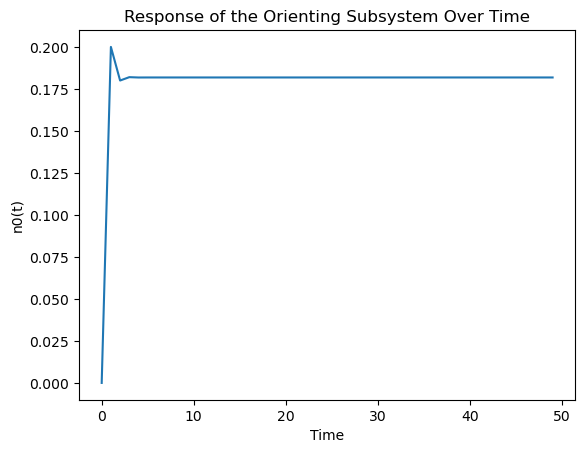

Reset signal sent to Layer 2 (mismatch detected)


In [2]:
# Import Seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize constants for the Orienting Subsystem
epsilon = 0.1  # time constant
alpha = 3      # excitatory input multiplier
beta = 4       # inhibitory input multiplier
rho = 0.75     # vigilance parameter
p = [1, 1]     # input pattern vector (binary values)
a = [1, 0]     # L2-L1 expectation vector (binary values)

# Define the Orienting Subsystem differential equation function
def dn_dt(n0, p, a):
    excitatory_input = alpha * sum(p)  # sum of p values weighted by alpha
    inhibitory_input = beta * sum(a)   # sum of a values weighted by beta
    dn_dt_value = -n0 + (1 - n0) * excitatory_input - (n0 + 1) * inhibitory_input
    return dn_dt_value

# Simulation parameters
time_steps = 50  # Number of time steps for the simulation
n0_values = [0]  # Initialize n0 with zero

# Simulate the system dynamics over time
for t in range(1, time_steps):
    n0_current = n0_values[-1]
    # Compute the change in n0 at this step
    delta_n0 = epsilon * dn_dt(n0_current, p, a)
    # Update n0 based on this change
    n0_new = n0_current + delta_n0
    n0_values.append(n0_new)

# Plot the response of the Orienting Subsystem over time
time = list(range(time_steps))
sns.lineplot(x=time, y=n0_values)
plt.xlabel("Time")
plt.ylabel("n0(t)")
plt.title("Response of the Orienting Subsystem Over Time")
plt.show()

# Determine if a reset signal should be sent
match_ratio = sum(a) / sum(p)
if match_ratio < rho:
    print("Reset signal sent to Layer 2 (mismatch detected)")
else:
    print("No reset signal sent (sufficient match)")


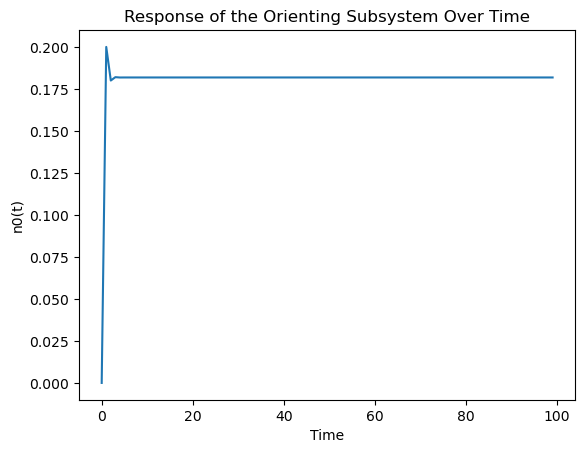

Reset signal sent to Layer 2 (mismatch detected)


In [3]:
# Import Seaborn and Matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize constants for the Orienting Subsystem
epsilon = 0.1  # time constant
alpha = 3      # excitatory input multiplier
beta = 4       # inhibitory input multiplier
rho = 0.75     # vigilance parameter
p = [1, 1]     # input pattern vector (binary values)
a = [1, 0]     # L2-L1 expectation vector (binary values)

# Define the function to calculate dn/dt based on the current state
def calculate_dn_dt(n0, p, a):
    # Excitatory and inhibitory inputs based on the summation and scaling
    excitatory_input = alpha * sum(p)  # excitatory contribution from p
    inhibitory_input = beta * sum(a)   # inhibitory contribution from a
    # Differential equation calculation
    dn_dt = -n0 + (1 - n0) * excitatory_input - (n0 + 1) * inhibitory_input
    return dn_dt

# Simulation parameters
time_steps = 100  # Number of time steps for the simulation
n0_values = [0]   # Initialize n0 with an initial value of 0

# Simulate the system dynamics over time
for t in range(1, time_steps):
    n0_current = n0_values[-1]
    # Calculate the change in n0 for the current time step
    delta_n0 = epsilon * calculate_dn_dt(n0_current, p, a)
    # Update n0 and append it to the list of values
    n0_new = n0_current + delta_n0
    n0_values.append(n0_new)

# Plot the response of the Orienting Subsystem over time
time = list(range(time_steps))
sns.lineplot(x=time, y=n0_values)
plt.xlabel("Time")
plt.ylabel("n0(t)")
plt.title("Response of the Orienting Subsystem Over Time")
plt.show()

# Calculate if a reset signal is needed
match_ratio = sum(a) / sum(p) if sum(p) != 0 else 0  # avoid division by zero
if match_ratio < rho:
    print("Reset signal sent to Layer 2 (mismatch detected)")
else:
    print("No reset signal sent (sufficient match)")


## Learning Law: L1-L2

The ART1 network has two separate learning laws: one for the L1-L2 connections and another for the L2-L1 connections. The L1-L2 connections use a type of instar learning to recognize a set of prototype patterns, while the L2-L1 connections use outstar learning to reproduce (or recall) these patterns.

Whenever the input pattern and the expectation have an adequate match, as determined by the Orienting Subsystem, both $ W_{1:2} $ and $ W_{2:1} $ are adapted. This process is referred to as resonance, hence the name adaptive resonance theory.

## Subset/Superset Dilemma

The learning in the L1-L2 connections of the ART1 network is similar to the learning in the Grossberg network. However, a major difference is that the ART1 network does not normalize the input patterns in Layer 1. This can lead to a problem when one prototype pattern is a subset of another.

For example, consider the L1-L2 connection matrix:

$$
W_{1:2} = \begin{pmatrix}
1 & 1 & 0 \\
1 & 1 & 1
\end{pmatrix}
$$

Thus, the prototype patterns are:

$$
\mathbf{w}_1 = \begin{pmatrix}
1 \\
0
\end{pmatrix}, \quad \mathbf{w}_2 = \begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

Here, $\mathbf{w}_1$ is a subset of $\mathbf{w}_2$, since $\mathbf{w}_2$ has a 1 wherever $\mathbf{w}_1$ has a 1.

If the output of Layer 1 is:

$$
\mathbf{a} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

Then the input to Layer 2 will be:

$$
\mathbf{W}_{1:2} \mathbf{a} = \begin{pmatrix}
1 & 1 & 0 \\
1 & 1 & 1
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

Both prototype vectors have the same inner product with $\mathbf{a}$, which illustrates the subset/superset dilemma.

One solution to this dilemma is to normalize the prototype patterns. For example, we could modify the L1-L2 matrix as follows:

$$
W_{1:2} = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{pmatrix}
$$

Now, the input to Layer 2 will be:

$$
\mathbf{W}_{1:2} \mathbf{a} = \begin{pmatrix}
\frac{1}{2} & \frac{1}{2} & 0 \\
\frac{1}{3} & \frac{1}{3} & \frac{1}{3}
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \begin{pmatrix}
\frac{1}{2} \\
\frac{1}{3}
\end{pmatrix}
$$

This modification ensures that the first prototype has the largest inner product with $\mathbf{a}$, thereby activating the first neuron in Layer 2.

## Learning Law for $ W_{1:2} $

The learning law for $ W_{1:2} $ is given by:

$$
\frac{d[W_{i}^{1:2}(t)]}{dt} = a_i(t) \left[ (b - W_{i}^{1:2}(t)) \zeta \left[ W \right] a(t) - (W_{i}^{1:2}(t) + b) \left[ W \right] a(t) \right]
$$

where 

$$
b = 1, \quad b = 0, \quad W = 0, \quad W = 1
$$

This equation governs the adaptation of the L1-L2 connections based on the input patterns and their matching with the expected patterns.

# Modified Form of Instar Learning

When neuron $ i $ of Layer 2 is active, the $ i $-th row of $ W_{1:2} $, denoted as $ w_{i,j}^{1:2} $, is moved in the direction of $ a_j $. The difference between Eq. (19.56) and the standard instar learning is that the elements of $ w_{i,j}^{1:2} $ compete, resulting in normalization of $ w_{i,j}^{1:2} $. 

In the bracket on the right side of Eq. (19.56), we can see that it takes the form of a shunting model, with on-center/off-surround input connections from $ a $. The excitatory bias is $ b = 1 $ (a vector of 1's), and the inhibitory bias is $ b = 0 $, which ensures that the elements of $ w_{i,j}^{1:2} $ remain between 0 and 1.

## Steady State Operation

To verify that Eq. (19.56) causes normalization of the prototype patterns, we will analyze the steady state operation. We assume that the outputs of Layer 1 and Layer 2 remain constant until the weights reach steady state, known as fast learning.

The equation for element $ w_{i,j}^{1:2} $ is:

$$
\frac{dw_{i,j}^{1:2}(t)}{dt} = a_i(t) \left( (1 - w_{i,j}^{1:2}(t)) \zeta a_j(t) - w_{i,j}^{1:2}(t) \sum_{k \neq j} a_k(t) \right) \tag{19.58}
$$

If we assume that neuron $ i $ is active in Layer 2 $( a_i(t) = 1 )$ and set the derivative to zero in Eq. (19.58), we obtain:

$$
0 = (1 - w_{i,j}^{1:2}) \zeta a_j - w_{i,j}^{1:2} \sum_{k \neq j} a_k \tag{19.59}
$$

### Case 1: When $ a_j = 1 $

In this case, we have:

$$
0 = (1 - w_{i,j}^{1:2}) \zeta - w_{i,j}^{1:2} (a - 1) \tag{19.60}
$$

Rearranging gives:

$$
\zeta w_{i,j}^{1:2} = \frac{\zeta}{\zeta + a - 1} \tag{19.61}
$$

(Note that $ \sum_{k} a_k = a $, since $ a $ is a binary vector.)

### Case 2: When $ a_j = 0 $

In this scenario, Eq. (19.59) reduces to:

$$
0 = -w_{i,j}^{1:2} a \tag{19.62}
$$

Thus, we find:

$$
w_{i,j}^{1:2} = 0 \tag{19.63}
$$

### Summary of Results

Combining the results from both cases, we have:

$$
w_{i,j}^{1:2} = \frac{\zeta a}{\zeta + a - 1} \tag{19.64}
$$

where $ \zeta > 1 $ ensures that the denominator will never equal zero. Therefore, the prototype patterns will be normalized, resolving the subset/superset dilemma. 

Here, "normalized" does not imply that all prototype vectors will have unit length in Euclidean distance; rather, it means that the rows of $ W_{1:2} $ with more nonzero entries will have elements of smaller magnitudes. Consequently, vectors with more nonzero entries may actually have a smaller length than those with fewer nonzero entries.


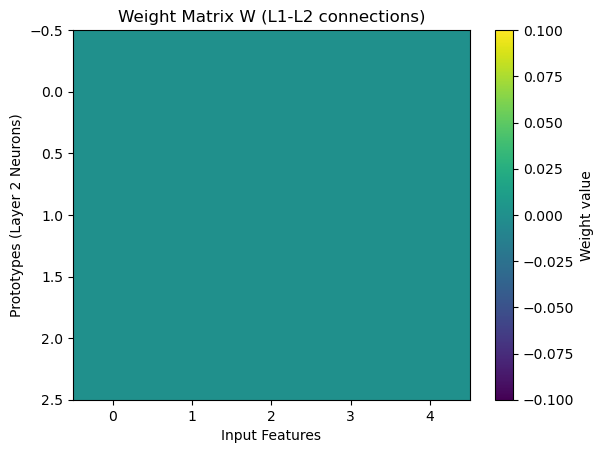

In [4]:
import matplotlib.pyplot as plt

class ART1:
    def __init__(self, num_prototypes, num_inputs):
        self.num_prototypes = num_prototypes  # Number of prototypes (neurons in Layer 2)
        self.num_inputs = num_inputs  # Number of input features (Layer 1)
        self.W = self.initialize_weights()  # Weight matrix for L1-L2 connections

    def initialize_weights(self):
        # Initialize weights between Layer 1 and Layer 2
        W = [[0.0 for _ in range(self.num_inputs)] for _ in range(self.num_prototypes)]
        return W

    def normalize_weights(self):
        # Normalize weights to avoid the subset/superset dilemma
        for i in range(self.num_prototypes):
            total = sum(self.W[i])
            if total > 0:
                self.W[i] = [w / total for w in self.W[i]]  # Normalize row

    def activate_layer(self, input_vector):
        # Calculate activation for Layer 2 based on Layer 1 input
        activations = [sum(input_vector[j] * self.W[i][j] for j in range(self.num_inputs)) for i in range(self.num_prototypes)]
        return activations

    def update_weights(self, input_vector, activations, zeta=1.5):
        for i in range(self.num_prototypes):
            if activations[i] > 0:  # If neuron in Layer 2 is active
                for j in range(self.num_inputs):
                    # Update weights according to the learning law
                    self.W[i][j] += input_vector[j] * (1 - self.W[i][j]) * zeta

    def train(self, input_data, num_epochs):
        for epoch in range(num_epochs):
            for input_vector in input_data:
                # Get activations for Layer 2
                activations = self.activate_layer(input_vector)
                # Update weights
                self.update_weights(input_vector, activations)
                # Normalize weights after updates
                self.normalize_weights()

    def display_weights(self):
        # Plot the weight matrix
        plt.imshow(self.W, cmap='viridis', aspect='auto')
        plt.colorbar(label='Weight value')
        plt.title('Weight Matrix W (L1-L2 connections)')
        plt.xlabel('Input Features')
        plt.ylabel('Prototypes (Layer 2 Neurons)')
        plt.show()

# Example usage
if __name__ == "__main__":
    num_prototypes = 3  # Number of neurons in Layer 2
    num_inputs = 5      # Number of input features (Layer 1)
    art1_network = ART1(num_prototypes, num_inputs)

    # Sample input data (each row is a different input pattern)
    input_data = [
        [1, 0, 0, 0, 1],
        [0, 1, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1],
    ]

    # Train the ART1 network
    art1_network.train(input_data, num_epochs=100)

    # Display the learned weights
    art1_network.display_weights()


## ART1 Algorithm Overview

The ART1 architecture employs two types of learning rules: instar and outstar. The outstar learning rule is applied to the connections $ W^{2:1} $ from Layer 2 to Layer 1. This rule enables the network to recall an appropriate prototype pattern (the expectation) for comparison with the input pattern.

## Learning Law: L2-L1 Connections

The learning law for $ W^{2:1} $ is given by:

$$
\frac{d w_j(t)}{dt} = a_j(t) \left[- w_j(t) + a(t)\right]
$$

When neuron $ j $ in Layer 2 is active (i.e., $ a_j(t) = 1 $), column $ j $ of $ W^{2:1} $ is adjusted towards the input pattern $ a(t) $. 

### Steady State Operation

Assuming fast learning, where the outputs of Layer 1 and Layer 2 remain constant until the weights stabilize, if neuron \( j \) is active:

Setting the derivative to zero, we obtain:

$$
0 = - w_j + a \quad \Rightarrow \quad w_j = a
$$

This indicates that column $ j $ of $ W^{2:1} $ converges to the output of Layer 1, $ a $.

## ART1 Algorithm Summary

1. **Initialization**:
   - Initialize the weight matrices $ W^{1:2} $ and $ W^{2:1} $.
   - Set the initial $ W^{2:1} $ matrix to all 1's, allowing the first time a new neuron in Layer 2 wins a competition to result in resonance, since:
   $$
   a = p \cap w_j = p \quad \Rightarrow \quad \frac{a}{p} = 1 > \rho
   $$
   - Each element of the initial $W^{1:2} $matrix is set to $\frac{1}{\zeta} \frac{1}{\zeta + S - 1} $

2. **Input Presentation**:
   - Present an input pattern to the network. Since Layer 2 is inactive initially $ a_j = 0 $, the output of Layer 1 is:
   $$
   a = p.
   $$

3. **Compute Input to Layer 2**:
   - Calculate the input to Layer 2:
   $$
   W^{1:2} a.
   $$
   - Activate the neuron in Layer 2 with the largest input:
   $$
   a_i = \begin{cases}
   1, & \text{if } (W^{1:2})^T a = \max\left[(W^{1:2})^k a\right] \\
   0, & \text{otherwise}
   \end{cases}
   $$

4. **Compute L2-L1 Expectation**:
   - If neuron $ j $ of Layer 2 is active, compute:
   $$
   W^{2:1} a = w_j.
   $$

5. **Adjust Layer 1 Output**:
   - Update Layer 1 output to include the L2-L1 expectation:
   $$
   a = p \cap w_j.
   $$

6. **Match Determination**:
   - The Orienting Subsystem checks the match degree:
   $$
   a = \begin{cases}
   1, & \text{if } \left(\frac{a}{p} < \rho\right) \\
   0, & \text{otherwise}
   \end{cases}
   $$

7. **Resonance Check**:
   - If $ a = 1 $, set $ a_j = 0 $ (inhibit) until a match occurs, then return to step 1.
   - If $ a = 0 $, proceed to step 8.

8. **Update Weights**:
   - Update row $ j $ of $ W^{1:2} $:
   $$
   W^{1:2}_{j} = \frac{\zeta a_j}{\zeta + a - 1}.
   $$

9. **Update L2-L1 Weights**:
   - Update column $ j $ of $ W^{2:1} $:
   $$
   w_j = a.
   $$

10. **Iterate**:
    - Remove the input pattern, restore all inhibited neurons in Layer 2, and return to step 1 with a new input pattern. Repeat until weights stabilize.

### Conclusion

The ART1 algorithm guarantees the formation of stable clusters for any set of input patterns, ensuring effective learning and adaptation to varying inputs.



In [5]:
# ART1 Algorithm Implementation

class ART1:
    def __init__(self, num_neurons_L1, num_neurons_L2, rho, zeta):
        """
        Initializes the ART1 network.

        Parameters:
        - num_neurons_L1: Number of neurons in Layer 1
        - num_neurons_L2: Number of neurons in Layer 2
        - rho: Vigilance parameter for matching
        - zeta: Scaling factor for weight normalization
        """
        self.num_neurons_L1 = num_neurons_L1
        self.num_neurons_L2 = num_neurons_L2
        self.rho = rho
        self.zeta = zeta
        
        # Initialize weight matrices
        self.W_1_2 = [[1 / (self.zeta + num_neurons_L1 - 1) for _ in range(num_neurons_L2)]]
        self.W_2_1 = [[1 for _ in range(num_neurons_L1)] for _ in range(num_neurons_L2)]

    def input_layer(self, input_pattern):
        """
        Present an input pattern to the network.

        Parameters:
        - input_pattern: The input pattern as a list of binary values (0 or 1)
        """
        # Calculate output of Layer 1
        a_L1 = input_pattern

        # Compute input to Layer 2
        input_to_L2 = [sum(self.W_2_1[j][i] * a_L1[i] for i in range(self.num_neurons_L1))
                       for j in range(self.num_neurons_L2)]

        # Activate the winning neuron in Layer 2
        winning_neuron = input_to_L2.index(max(input_to_L2))
        
        # Compute the expectation from Layer 2 to Layer 1
        expectation = self.W_2_1[winning_neuron]

        # Adjust Layer 1 output
        a_L1_adjusted = [min(1, a_L1[i] * expectation[i]) for i in range(self.num_neurons_L1)]
        
        # Check match with vigilance criterion
        match = sum(a_L1_adjusted) / sum(a_L1) if sum(a_L1) > 0 else 0

        if match < self.rho:
            # No resonance, inhibit the winning neuron
            self.W_2_1[winning_neuron] = [0] * self.num_neurons_L1
            return False  # No resonance
        
        # Update weights
        self.update_weights(winning_neuron, a_L1)

        return True  # Resonance occurred

    def update_weights(self, winning_neuron, a_L1):
        """
        Updates the weights after resonance occurs.

        Parameters:
        - winning_neuron: The index of the winning neuron in Layer 2
        - a_L1: The output pattern from Layer 1
        """
        # Update row j of W^{1:2}
        for i in range(self.num_neurons_L1):
            self.W_2_1[winning_neuron][i] = (self.zeta * a_L1[i]) / (self.zeta + sum(a_L1) - 1)

        # Update column j of W^{2:1}
        self.W_1_2[0][winning_neuron] = a_L1

    def fit(self, input_patterns):
        """
        Fit the model to the input patterns.

        Parameters:
        - input_patterns: A list of input patterns to train on
        """
        for input_pattern in input_patterns:
            self.input_layer(input_pattern)


# Example Usage
num_neurons_L1 = 3
num_neurons_L2 = 3
rho = 0.7
zeta = 1.0

# Create an ART1 network
art1_network = ART1(num_neurons_L1, num_neurons_L2, rho, zeta)

# Define some input patterns
input_patterns = [
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
]

# Train the ART1 network
for pattern in input_patterns:
    resonance = art1_network.fit([pattern])
    if resonance:
        print(f'Resonance occurred for input pattern: {pattern}')
    else:
        print(f'No resonance for input pattern: {pattern}')


No resonance for input pattern: [1, 0, 0]
No resonance for input pattern: [1, 1, 0]
No resonance for input pattern: [0, 1, 1]
No resonance for input pattern: [0, 0, 1]


## Other ART Architectures 

The ART1 network is just one example of adaptive resonance theory. Car- penter and Grossberg, and others in their research group, have developed many variations on this theme. One disadvantage of the ART1 network is that it can only be used for bina- ry input patterns. Carpenter and Grossberg developed a variation of ART1, called ART2, to handle either analog or binary patterns [CaGr87b]. The ba- sic structure of ART2 is very similar to ART1, with the exception of Layer 1. In ART2 several sublayers take the place of Layer 1. These sublayers are needed because analog vectors, unlike binary vectors, can be arbitrarily close together. The sublayers perform a combination of normalization and noise suppression, in addition to the comparison of the input vector and the expectation that is needed by the orienting subsystem. Carpenter and Grossberg later developed the ART3 network [CaGr90], which introduced a more sophisticated biological model for the reset mech- anism required for ART. Up to the present time, this network has not been widely applied. In 1991 Carpenter, Grossberg and Reynolds introduced the ARTMAP net- work [CaGrRe91]. In contrast with all of the previous ART networks, it is a supervised network. The ARTMAP architecture consists of two ART mod- ules that are connected by an inter-ART associative memory. One ART module receives the input vector, while the other ART module receives the desired output vector. The network learns to predict the correct output vec- tor whenever the input vector is presented. More recently, Carpenter, Grossberg, Markuzon, Reynolds and Rosen have modified the ARTMAP architecture to incorporate fuzzy logic. The result is referred to as Fuzzy ARTMAP [CaGrMa92]. It seems to improve perfor- mance, especially with noisy input patterns. All of these ART architectures incorporate the key modules discussed in this chapter, including:  L1-L2 instars for pattern recognition.  L2-L1 outstars for pattern recall.  Layer 2 for contrast enhancement (competition).  Layer 1 for comparison of input and expectation.  Orienting Subsystem for resetting when a pattern mismatch occurs.

No resonance for input pattern: [1, 0, 0]
No resonance for input pattern: [1, 1, 0]
No resonance for input pattern: [0, 1, 1]
No resonance for input pattern: [0, 0, 1]


ValueError: Must pass 2-d input. shape=(1, 3, 3)

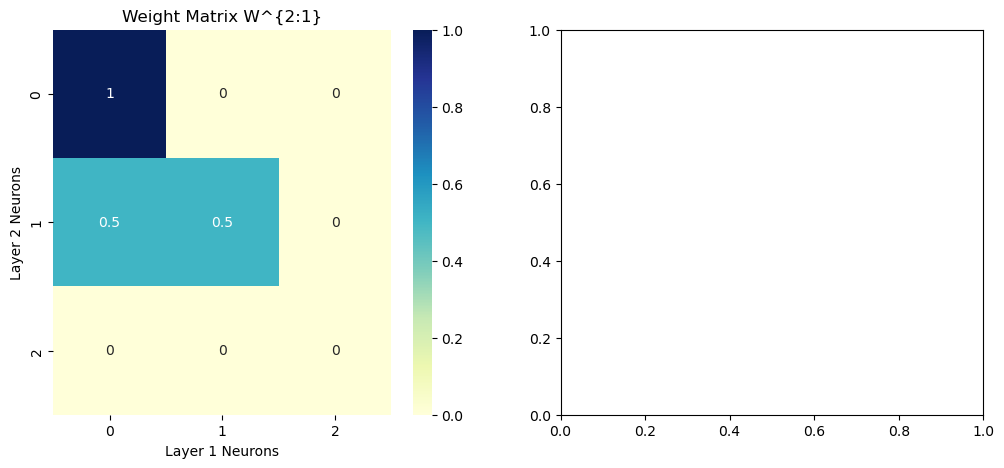

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

class ART1:
    def __init__(self, num_neurons_L1, num_neurons_L2, rho, zeta):
        self.num_neurons_L1 = num_neurons_L1
        self.num_neurons_L2 = num_neurons_L2
        self.rho = rho
        self.zeta = zeta
        
        # Initialize weight matrices
        self.W_1_2 = [[1 / (self.zeta + num_neurons_L1 - 1) for _ in range(num_neurons_L2)]]
        self.W_2_1 = [[1 for _ in range(num_neurons_L1)] for _ in range(num_neurons_L2)]

    def input_layer(self, input_pattern):
        a_L1 = input_pattern

        # Compute input to Layer 2
        input_to_L2 = [sum(self.W_2_1[j][i] * a_L1[i] for i in range(self.num_neurons_L1))
                       for j in range(self.num_neurons_L2)]

        # Activate the winning neuron in Layer 2
        winning_neuron = input_to_L2.index(max(input_to_L2))
        
        # Compute the expectation from Layer 2 to Layer 1
        expectation = self.W_2_1[winning_neuron]

        # Adjust Layer 1 output
        a_L1_adjusted = [min(1, a_L1[i] * expectation[i]) for i in range(self.num_neurons_L1)]
        
        # Check match with vigilance criterion
        match = sum(a_L1_adjusted) / sum(a_L1) if sum(a_L1) > 0 else 0

        if match < self.rho:
            self.W_2_1[winning_neuron] = [0] * self.num_neurons_L1
            return False
        
        # Update weights
        self.update_weights(winning_neuron, a_L1)

        return True

    def update_weights(self, winning_neuron, a_L1):
        for i in range(self.num_neurons_L1):
            self.W_2_1[winning_neuron][i] = (self.zeta * a_L1[i]) / (self.zeta + sum(a_L1) - 1)

        self.W_1_2[0][winning_neuron] = a_L1

    def fit(self, input_patterns):
        for input_pattern in input_patterns:
            self.input_layer(input_pattern)

    def plot_weights(self):
        """
        Plot the weight matrices using Seaborn heatmaps.
        """
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot W^{2:1} as a heatmap
        sns.heatmap(self.W_2_1, ax=axes[0], annot=True, cmap="YlGnBu", cbar=True)
        axes[0].set_title('Weight Matrix W^{2:1}')
        axes[0].set_xlabel('Layer 1 Neurons')
        axes[0].set_ylabel('Layer 2 Neurons')

        # Plot W^{1:2} as a heatmap
        sns.heatmap(self.W_1_2, ax=axes[1], annot=True, cmap="YlGnBu", cbar=True)
        axes[1].set_title('Weight Matrix W^{1:2}')
        axes[1].set_xlabel('Layer 2 Neurons')
        axes[1].set_ylabel('Layer 1 Neurons')

        plt.tight_layout()
        plt.show()


# Example Usage
num_neurons_L1 = 3
num_neurons_L2 = 3
rho = 0.7
zeta = 1.0

# Create an ART1 network
art1_network = ART1(num_neurons_L1, num_neurons_L2, rho, zeta)

# Define some input patterns
input_patterns = [
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
]

# Train the ART1 network
for pattern in input_patterns:
    resonance = art1_network.fit([pattern])
    if resonance:
        print(f'Resonance occurred for input pattern: {pattern}')
    else:
        print(f'No resonance for input pattern: {pattern}')

# Plot the weights after training
art1_network.plot_weights()


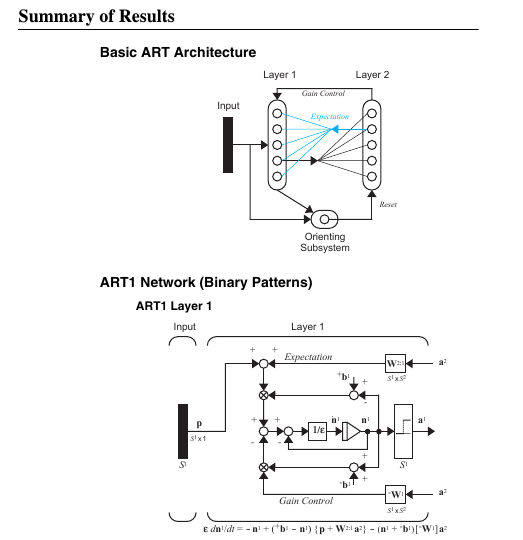

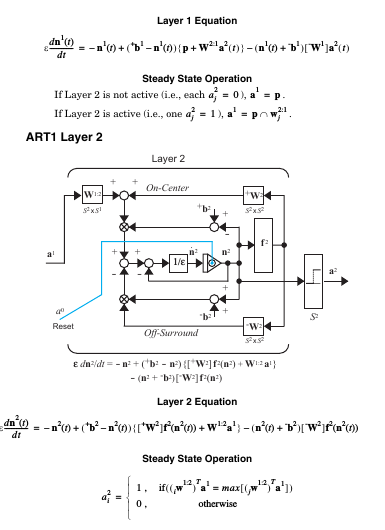

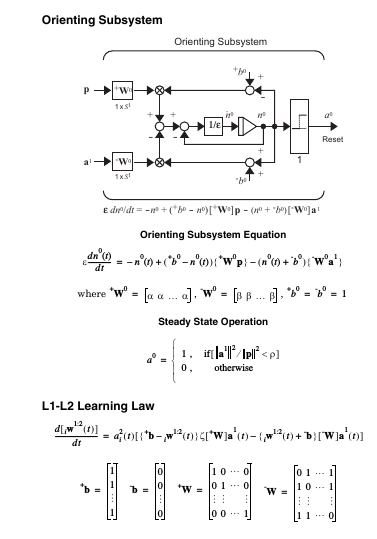

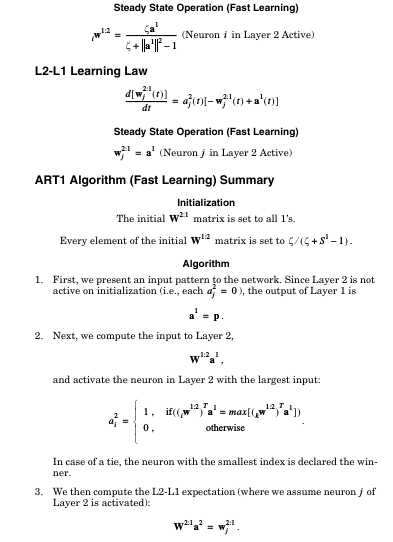